## Problem 2f

In [14]:
import math
from itertools import chain, combinations


def shap_val(player_set):


    def v_s(tup):
        x1 = x2 =x3 = x4 = x5 = 0
        input_set = set(tup)

        if 1 in input_set:
            x1 = 1
        if 2 in input_set:
            x2 = 1
        if 3 in input_set:
            x3 = 1
        if 4 in input_set:
            x4 = 1
        if 5 in input_set:
            x5 = 1
        v = 1*x2 + 1*x3 + 2*x4 + 3*x1*x3 + 5*x2*x5 - 10*x1*x2*x4
        return v


    def get_subsets(initial_set):
        t = list(initial_set)
        return chain.from_iterable(combinations(t, i) for i in range(len(t)))


    subsets = []
    for s in get_subsets(player_set):
        subsets.append(s)



    d = len(player_set)
    for i in player_set:
        subset_val=[]
        for subset in subsets:
            if i not in subset:
                list1 = list(subset)
                list1.append(i)
                s_i = tuple(sorted(list1))
                v_val = v_s(s_i) - v_s(subset)

                #Calculate factorial part
                fact = (math.factorial(len(subset))*math.factorial(d - len(subset) - 1)) / math.factorial(d)


                subset_val.append(fact*v_val)


        print("Player", i, sum(subset_val))


In [15]:
shap_val({1,2,3,4,5})

Player 1 -1.8333333333333335
Player 2 0.16666666666666674
Player 3 2.5
Player 4 -1.3333333333333337
Player 5 2.5


## Problem 4

In [135]:
import shap
from sklearn.model_selection import train_test_split
X , y = shap.datasets.adult () # Numerical version of data
X_display , y_display = shap.datasets.adult ( display = True ) # Human - readable data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =0.2 , random_state =7)

### a

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, random_state=10)
clf.fit(X_train.values, y_train)

GradientBoostingClassifier(random_state=10)

In [137]:
from sklearn.metrics import zero_one_loss
from sklearn.metrics import log_loss

train_pred = clf.predict(X_train.values)
train_error_zero_one = zero_one_loss(y_train, train_pred)
train_error_log_loss = log_loss(y_train, train_pred)


test_pred = clf.predict(X_test.values)
test_error_zero_one = zero_one_loss(y_test, test_pred)
test_error_log_loss = log_loss(y_test, test_pred)

print("Train: ")
print("Zero-one classification error: ", train_error_zero_one)
print("Log-loss: ", train_error_log_loss)

print("Test: ")
print("Zero-one classification error: ",test_error_zero_one)
print("Log-loss: ", test_error_log_loss)


Train: 
Zero-one classification error:  0.13148802211302213
Log-loss:  4.739308693862341
Test: 
Zero-one classification error:  0.1337325349301397
Log-loss:  4.820209135869959


### b

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle




features = X_test.columns

importance_values = []

print("Feature permutated: Change in zero-one error")
for f in features:
    shuffled = X_test.copy()
    shuffled[f] = shuffle(shuffled[f]).values
    pred = clf.predict(shuffled.values)
    error = zero_one_loss(y_test, pred)
    print(f, test_error_zero_one - error)
    importance_values.append(test_error_zero_one - error)



Feature permutated: Change in zero-one error
Age -0.015046829418086882
Workclass -0.00015353907569481962
Education-Num -0.03792415169660679
Marital Status -0.00015353907569481962
Occupation -0.006295102103485384
Relationship -0.04606172270842934
Race -0.0009212344541685846
Sex -0.000767695378473876
Capital Gain -0.05373867649316755
Capital Loss -0.012590204206970657
Hours per week -0.005680945800706327
Country -0.0010747735298634042


Text(0.5, 1.0, 'Zero-one error change after Permutation')

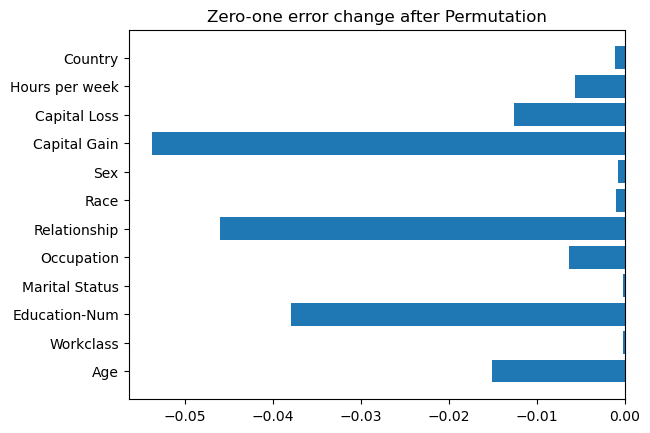

In [461]:
plt.barh(features, importance_values)
plt.title("Zero-one error change after Permutation")

### c

In [451]:
sd_val_10 = []
mean_val_10 = []
for f in features:
    val = []
    for i in range(10):
        shuffled = X_test.copy()
        shuffled[f] = shuffle(shuffled[f]).values
        pred = clf.predict(shuffled.values)
        error = zero_one_loss(y_test, pred)
        val.append(test_error_zero_one - error)

    mean_val_10.append(np.mean(val))
    sd_val_10.append(np.std(val))





Text(0.5, 1.0, 'Mean of 10 runs Zero-one error change after Permutation with SD Error Bars')

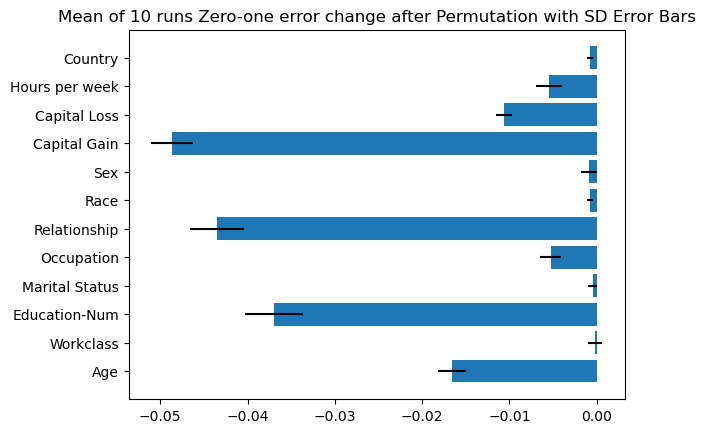

In [457]:
plt.barh(features, mean_val_10, xerr = sd_val_10)
plt.title("Mean of 10 runs Zero-one error change after Permutation with SD Error Bars")

### d

In [155]:
mean_val = []
for f in features:
    mean_feature = X_test.copy()
    mean_feature[f] = np.mean(mean_feature[f])
    pred = clf.predict(mean_feature.values)
    error = zero_one_loss(y_test, pred)
    print(f, test_error_zero_one - error)
    mean_val.append(test_error_zero_one - error)

Age -0.007369875633348677
Workclass 0.0001535390756947086
Education-Num -0.017964071856287456
Marital Status -0.0006141563027790564
Occupation -0.009365883617380666
Relationship -0.048978965146629805
Race -0.0006141563027790564
Sex 0.0
Capital Gain -0.03086135421464764
Capital Loss -0.007369875633348677
Hours per week -0.003070781513895282
Country -0.000767695378473876


Text(0.5, 1.0, 'Zero-one error change after Permutation by mean')

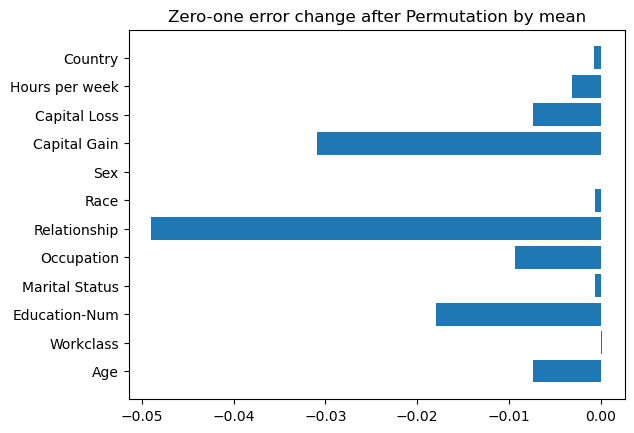

In [161]:
plt.barh(features, mean_val)
plt.title("Zero-one error change after Permutation by mean")

### e

In [458]:
log_values = []

print("Feature permutated: Change in zero-one error")
for f in features:
    shuffled = X_test.copy()
    shuffled[f] = shuffle(shuffled[f]).values
    pred = clf.predict(shuffled.values)
    loss = log_loss(y_test, pred)
    print(f, test_error_log_loss - loss)
    log_values.append(test_error_log_loss - loss)

Feature permutated: Change in zero-one error
Age -0.6530248886712453
Workclass -0.0664093107123298
Education-Num -1.510811818705509
Marital Status -0.022136436904109935
Occupation -0.07194341993835707
Relationship -1.5274141463835909
Race -0.016602327678082673
Sex 0.016602327678082673
Capital Gain -1.8815971368493516
Capital Loss -0.43166051963014507
Hours per week -0.3486488812397326
Country -0.016602327678082673


Text(0.5, 1.0, 'Log Loss change after Permutation')

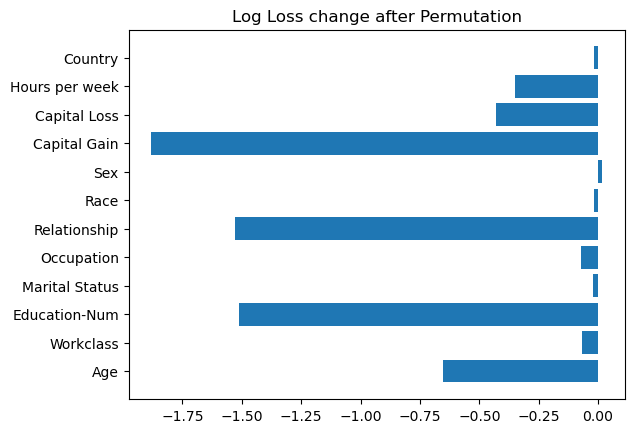

In [459]:
plt.barh(features, log_values)
plt.title("Log Loss change after Permutation")

## Problem 5

In [169]:
explicands = X_test[:200]
baselines = X_test[-100:]

### TreeSHAP

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


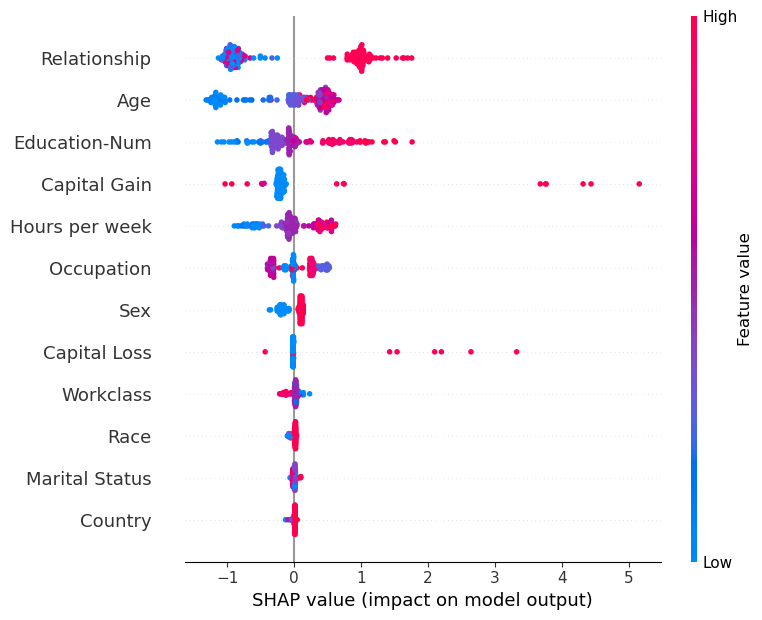

In [336]:
import shap
explainer = shap.TreeExplainer(clf,baselines)
attributions_tree = explainer.shap_values(explicands)
shap.summary_plot(attributions_tree,explicands)

### KernelSHAP

In [370]:
import shap
explainer = shap.KernelExplainer(clf.predict_proba,baselines)
attributions_kern = explainer.shap_values(explicands)[1]

  0%|          | 0/200 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


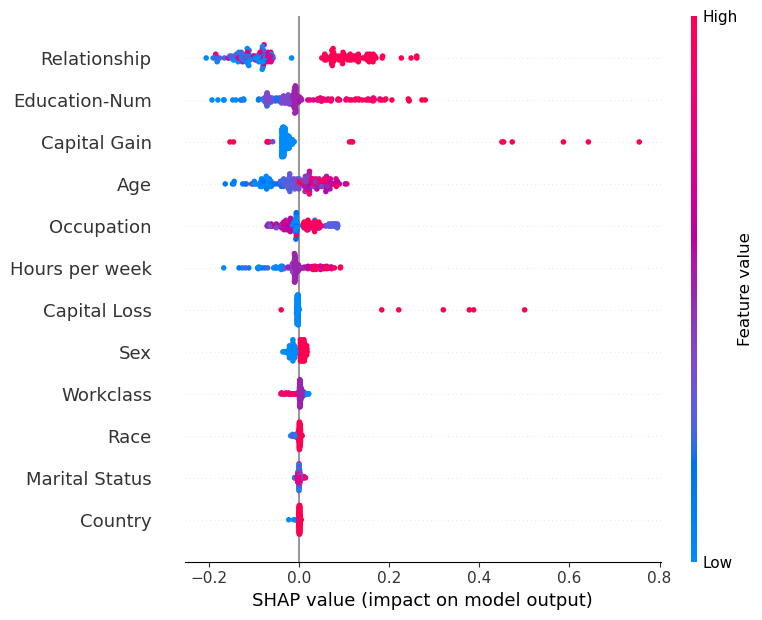

In [342]:
shap.summary_plot(attributions_kern,explicands)

In [462]:
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values)
attributions_list = []
for index in range(len(explicands)):
    attribution = explainer.explain_instance(explicands.iloc[index,].values, clf.predict_proba, num_features=12).local_exp[1]
    order_attribution = sorted(attribution)
    att_array = np.array([tup[1] for tup in order_attribution])
    attributions_list.append(att_array)


attributions_lime = np.vstack(attributions_list)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


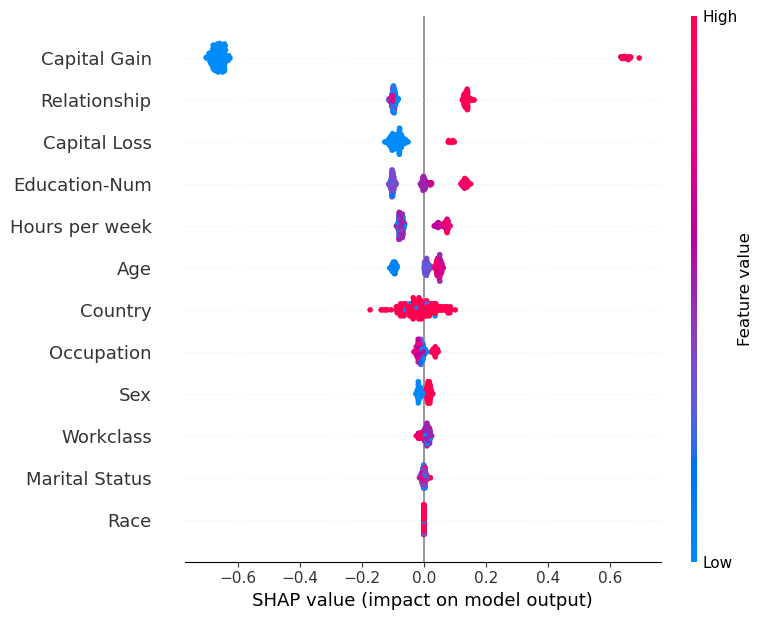

In [344]:
shap.summary_plot(attributions_lime,explicands)

### Based on the summary plots, what are the most important features according to each method?

According to TreeSHAP Relationship, Age, and Education-Num are the three most important features. According to KernelSHAP, Relationship, Education-Num, and Capital Gain are the most important features. According to LIME, Capital Gain, Relationship, and Capital Loss are the three most important features. 

### b

Text(0, 0.5, 'Feature attribution')

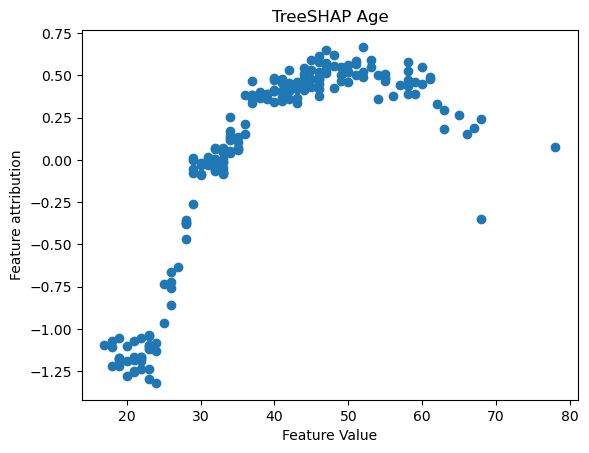

In [339]:
import matplotlib.pyplot as plt

plt.scatter(explicands["Age"].values,attributions_tree[:, 0] )
plt.title("TreeSHAP Age")
plt.xlabel("Feature Value")
plt.ylabel("Feature attribution")

Text(0, 0.5, 'Feature attribution')

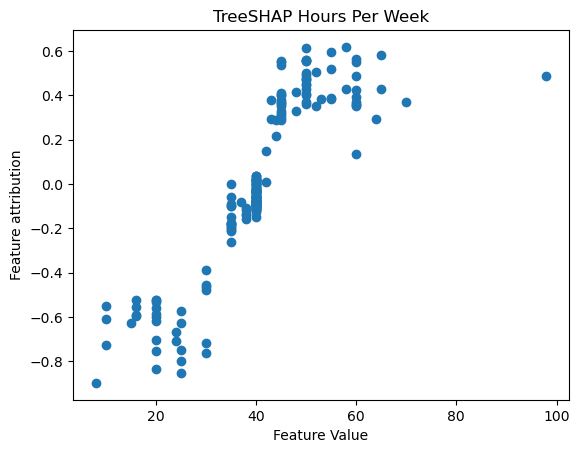

In [340]:
plt.scatter(explicands["Hours per week"].values,attributions_tree[:, 10] )
plt.title("TreeSHAP Hours Per Week")
plt.xlabel("Feature Value")
plt.ylabel("Feature attribution")

Text(0, 0.5, 'Feature attribution')

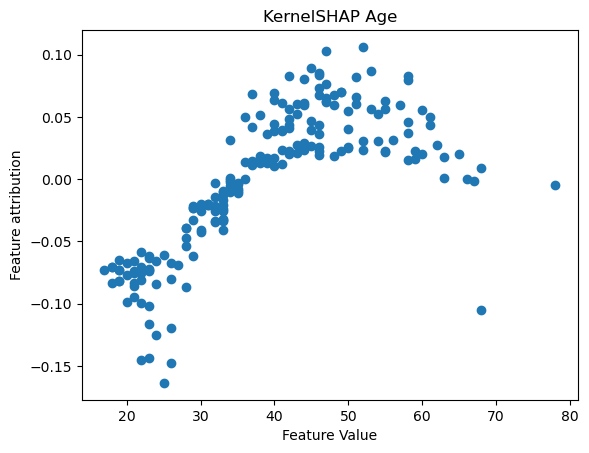

In [345]:
plt.scatter(explicands["Age"].values,attributions_kern[:, 0] )
plt.title("KernelSHAP Age")
plt.xlabel("Feature Value")
plt.ylabel("Feature attribution")

Text(0, 0.5, 'Feature attribution')

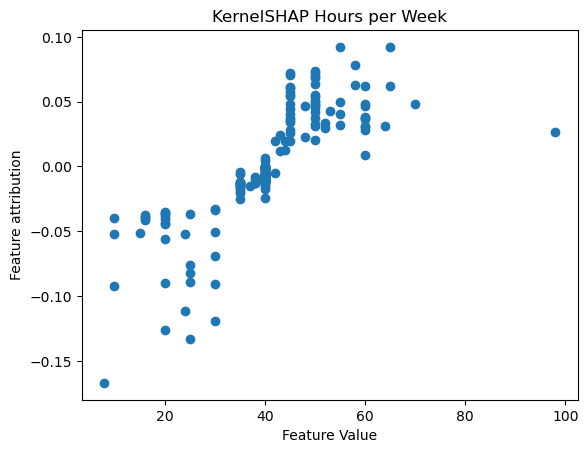

In [347]:
plt.scatter(explicands["Hours per week"].values,attributions_kern[:, 10] )
plt.title("KernelSHAP Hours per Week")
plt.xlabel("Feature Value")
plt.ylabel("Feature attribution")

Text(0, 0.5, 'Feature attribution')

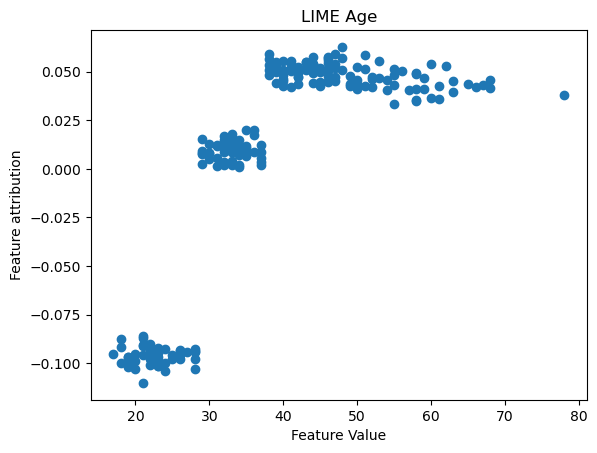

In [348]:
plt.scatter(explicands["Age"].values,attributions_lime[:, 0] )
plt.title("LIME Age")
plt.xlabel("Feature Value")
plt.ylabel("Feature attribution")

Text(0, 0.5, 'Feature attribution')

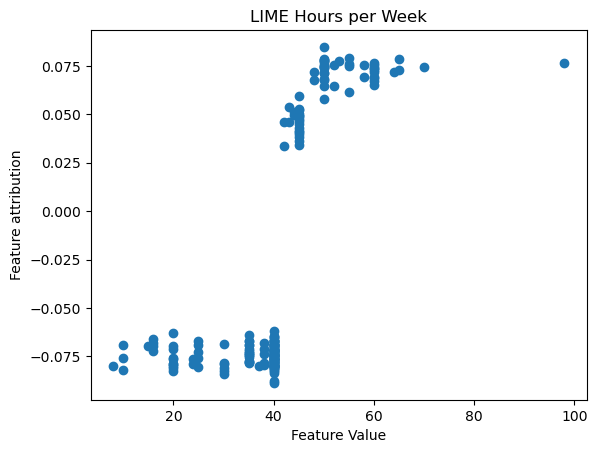

In [349]:
plt.scatter(explicands["Hours per week"].values,attributions_lime[:, 10] )
plt.title("LIME Hours per Week")
plt.xlabel("Feature Value")
plt.ylabel("Feature attribution")

### Based on these plots what observations can you make about how these features relate to the model's income prediction?

When the age is around 40 - 60 and the hours per week is above 40, there is a postive feature attribution, impacting prediction that the income is over 50,000 and when the age is lower, under 40, and the hours per week is under 40, the feature attribution is negative, impacting the prediction that the income is under 50,000. The hours per week 

### c

Text(0.5, 0, 'Feature attribution')

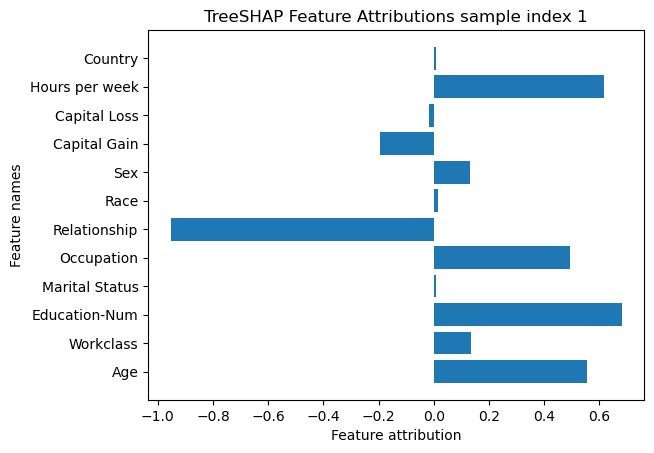

In [463]:
plt.barh(explicands.columns, attributions_tree[1,])
plt.title("TreeSHAP Feature Attributions sample index 1")
plt.ylabel("Feature names")
plt.xlabel("Feature attribution")

Text(0.5, 0, 'Feature attribution')

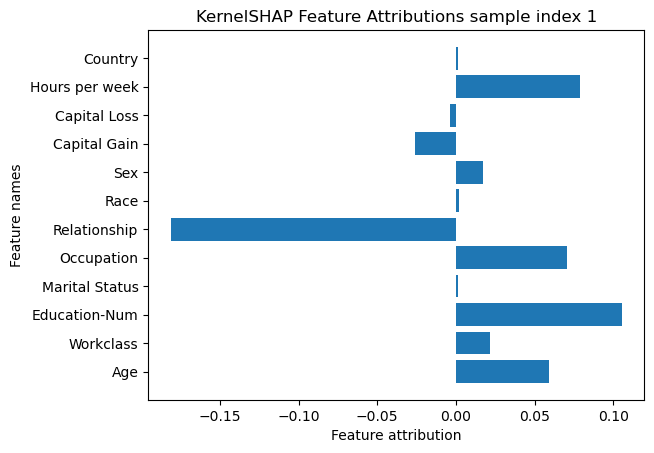

In [364]:
plt.barh(explicands.columns, attributions_kern[1,])
plt.title("KernelSHAP Feature Attributions sample index 1")
plt.ylabel("Feature names")
plt.xlabel("Feature attribution")

Text(0.5, 0, 'Feature attribution')

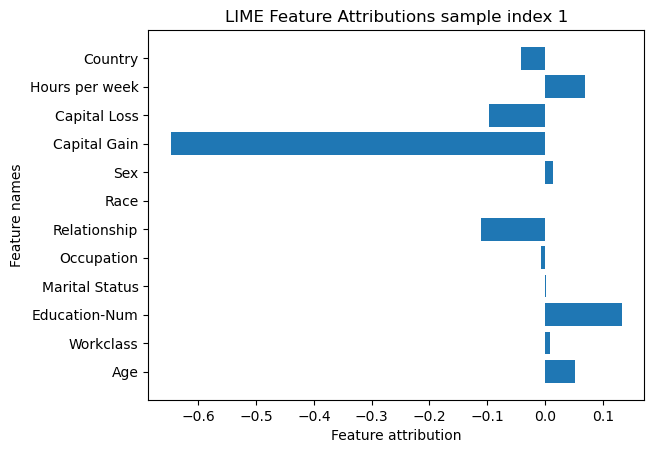

In [366]:
plt.barh(explicands.columns, attributions_lime[1,])
plt.title("LIME Feature Attributions sample index 1")
plt.ylabel("Feature names")
plt.xlabel("Feature attribution")

### Based on the TreeSHAP attributions, describe one feature that makes a strong positive impact to this sample's prediciton and one feature that makes a strong negative contribution.

Based on the TreeSHAP attributions, Education-Num makes a strong positive impact to this sample's prediction and Relationship makes a strong negative contribution.


### d


In [467]:
explainer = shap.KernelExplainer(clf.predict_proba,baselines)
nsamples_10 = []
for i in range(10):
    attributions_kern_10 = explainer.shap_values(X_test.iloc[1], nsamples = 10)[1]
    nsamples_10.append(attributions_kern_10)


Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.058e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.974e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.382e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.989e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

In [376]:
nsamples_10_array = np.vstack(nsamples_10)

In [404]:
mean_10 = np.zeros(12)
sd_10 = np.zeros(12)
for j in range(12):
    mean_10[j] = np.mean(nsamples_10_array[:,j])
    sd_10[j] = np.std(nsamples_10_array[:, j])

Text(0.5, 0, 'Mean Feature attribution')

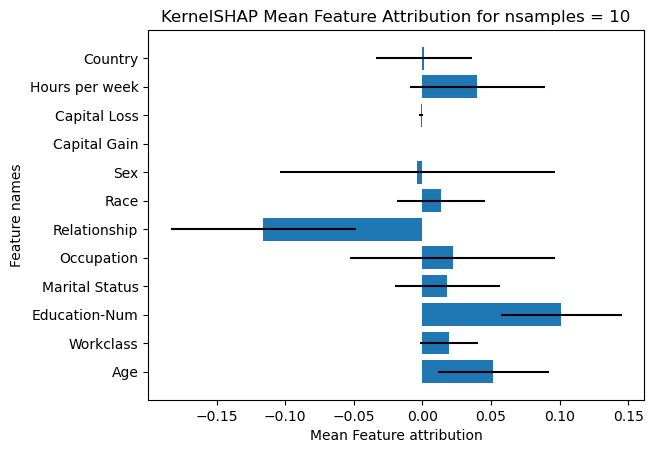

In [424]:
plt.barh(explicands.columns, mean_10, xerr = sd_10)

plt.title("KernelSHAP Mean Feature Attribution for nsamples = 10")
plt.ylabel("Feature names")
plt.xlabel("Mean Feature attribution")

In [443]:
explainer = shap.KernelExplainer(clf.predict_proba,baselines)
nsamples_100 = []
for i in range(10):
    attributions_kern_100 = explainer.shap_values(X_test.iloc[1], nsamples = 100)[1]
    nsamples_100.append(attributions_kern_100)

In [444]:
nsamples_100_array = np.vstack(nsamples_100)

mean_100 = np.zeros(12)
sd_100 = np.zeros(12)
for j in range(12):
    mean_100[j] = np.mean(nsamples_100_array[:,j])
    sd_100[j] = np.std(nsamples_100_array[:, j])

Text(0.5, 0, 'Mean Feature attribution')

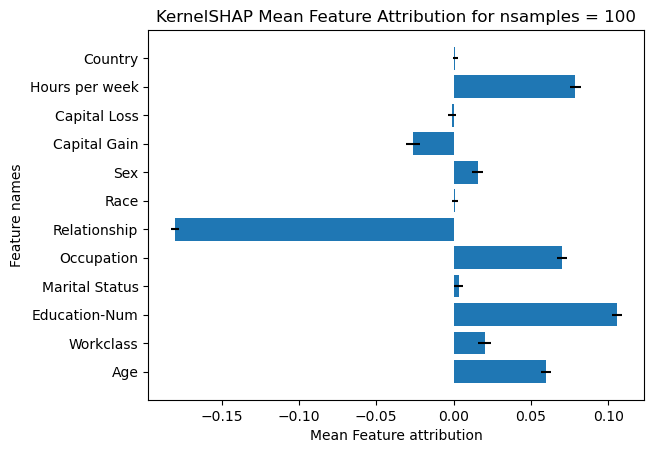

In [445]:
plt.barh(explicands.columns, mean_100, xerr = sd_100)

plt.title("KernelSHAP Mean Feature Attribution for nsamples = 100")
plt.ylabel("Feature names")
plt.xlabel("Mean Feature attribution")

In [446]:
explainer = shap.KernelExplainer(clf.predict_proba,baselines)
nsamples_1000 = []
for i in range(10):
    attributions_kern_1000 = explainer.shap_values(X_test.iloc[1], nsamples = 1000)[1]
    nsamples_1000.append(attributions_kern_1000)

In [447]:
nsamples_1000_array = np.vstack(nsamples_1000)

mean_1000 = np.zeros(12)
sd_1000 = np.zeros(12)
for j in range(12):
    mean_1000[j] = np.mean(nsamples_1000_array[:,j])
    sd_1000[j] = np.std(nsamples_1000_array[:, j])

Text(0.5, 0, 'Mean Feature attribution')

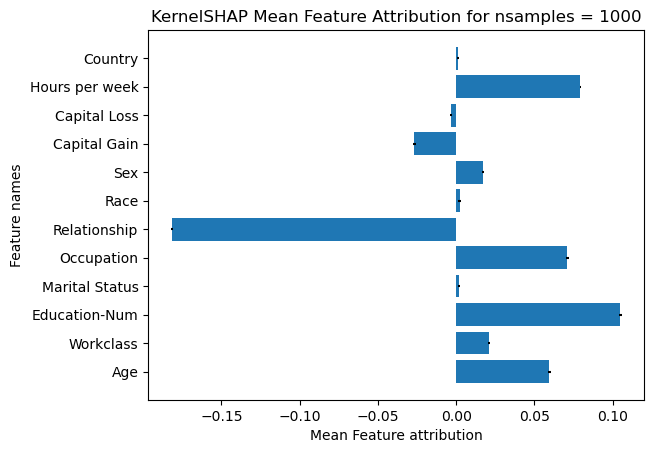

In [448]:
plt.barh(explicands.columns, mean_1000, xerr = sd_1000)

plt.title("KernelSHAP Mean Feature Attribution for nsamples = 1000")
plt.ylabel("Feature names")
plt.xlabel("Mean Feature attribution")

The more samples that we use, the smaller the standard deviation is between each run. The mean values for the 10 runs of each different nsamples value are very similar, but the variance between each run decreases a lot as we increase the nsamples. Likely, we are seeing the feature attribution etsimates converge to their true value as we increase nsamples as there is very little change between each run. 